In [1]:
# Classify 3 dog breeds based on dog's weight and height (n_samples=300)

import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv("dogs.csv")
X = data.copy()
y = X.pop("Class")
y, class_encoding = y.factorize(sort=True)  # Ordinal encoding of target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)  # fit to training data and transform it
X_test_std = scaler.transform(X_test)  # transfrom test data

In [4]:
ker = "linear"  # kernel to use
model = SVC(kernel=ker)
model.fit(X_train_std, y_train)
y_pred_train = model.predict(X_train_std)
y_pred_test = model.predict(X_test_std)

In [5]:
score_train = accuracy_score(y_train, y_pred_train)
score_cv_train = np.mean(
    cross_val_score(model, X_train_std, y_train, scoring="accuracy")
)
score_test = accuracy_score(y_test, y_pred_test)

[Text(0.5, 0, 'Weight'), Text(0, 0.5, 'Height')]

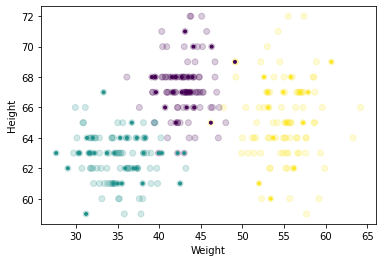

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=X_train.Weight, y=X_train.Height, c=y_train, alpha=0.2, marker="o")
ax.scatter(x=X_test.Weight, y=X_test.Height, c=y_test, alpha=0.2, marker="o")
ax.scatter(x=X_test.Weight, y=X_test.Height, c=y_pred_test, alpha=1, marker=".")
ax.set(xlabel="Weight", ylabel="Height")

In [7]:
# Making a pipeline is easier and more succinct
modelpipe = make_pipeline(StandardScaler(), SVC(kernel=ker))
modelpipe.fit(X_train, y_train)
preds = modelpipe.predict(X_test)
score = accuracy_score(y_test, preds)

[Text(0.5, 0, 'Weight'), Text(0, 0.5, 'Height')]

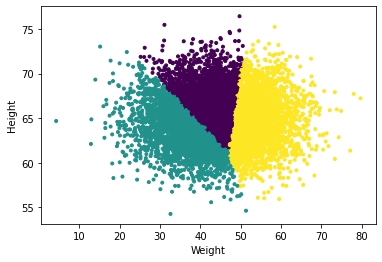

In [9]:
# Visualize decision boundaries given the stated kernel
test_rand = np.random.randn(10000, 2) * [X.Weight.std(), X.Height.std()] + [
    X.Weight.mean(), X.Height.mean()]
preds_test_rand = modelpipe.predict(test_rand)

fig, ax = plt.subplots()
ax.scatter(x=test_rand[:, 0], y=test_rand[:, 1], c=preds_test_rand, alpha=0.75, marker=".")
ax.set(xlabel="Weight", ylabel="Height")